## Importing Necessary Libraries and Dataset


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
!pip install hvplot
import hvplot.pandas
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import hist
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import matplotlib.ticker as mtick
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [ ]:
os.chdir(r'C:\Users\ancha\Downloads')
df_heart=pd.read_csv('heart.csv')
print(df_heart)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

## Exploratory Data Analysis

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:

pd.set_option("display.float", "{:.2f}".format)
df_heart.HeartDisease.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', color=[(0.57,0,0.14)]
    ,width=500, height=350
)

:Bars   [index]   (HeartDisease)

In [ ]:
categorical_val=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina', 'ST_Slope','HeartDisease']
continous_val=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

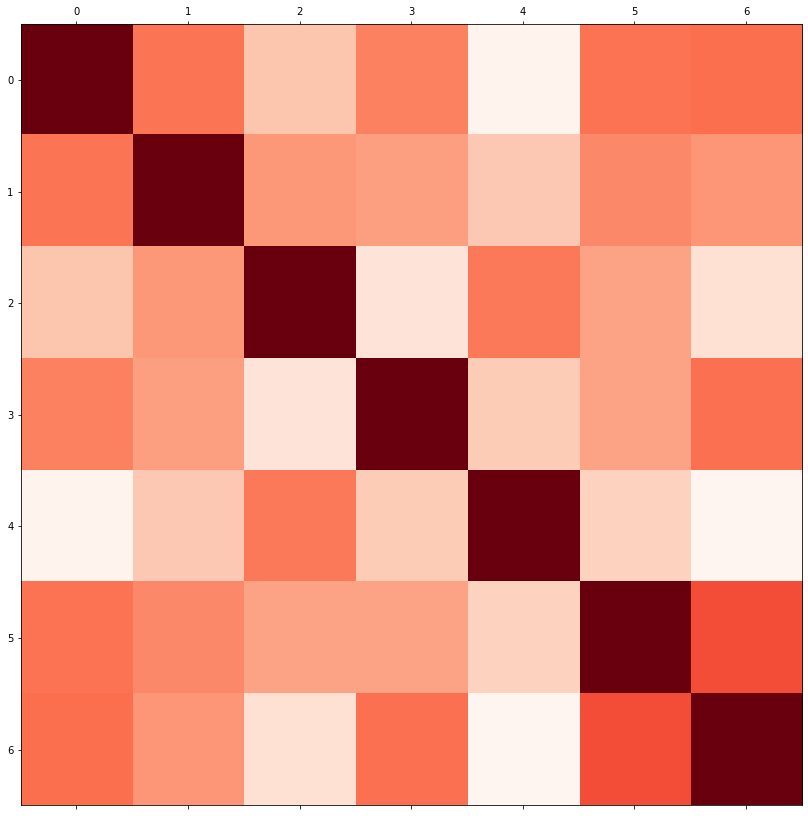

In [ ]:
newdf=df_heart.drop(['Sex'],axis=1)
rcParams['figure.figsize']=20,14
plt.matshow(newdf.corr(),cmap='Reds')
#plt.imshow(plt,cmap='Reds')

In [ ]:
#have_disease = df_heart.loc[df_heart['HeartDisease']==1, 'Sex'].value_counts().hvplot.bar(alpha=0.4)
#no_disease = df_heart.loc[df_heart['HeartDisease']==0, 'Sex'].value_counts().hvplot.bar(alpha=0.4)

#a= df_heart[df_heart['Sex']=='M']
#b= df_heart[df_heart['Sex']=='F']
#plt.bar(a['HeartDisease'],a['HeartDisease'].value_counts(), color=[(0.57,0,0.14)],label='Male')
#plt.hist(b['HeartDisease'],color='grey',label='Female')
#plt.legend(loc='center',fontsize='xx-large')
#plt.xlabel('Heart Disease',fontsize=20)
#plt.ylabel('Heart Disease Count',fontsize=20)
#plt.title('Heart Disease by Sex',fontsize=24)
#plt.show()

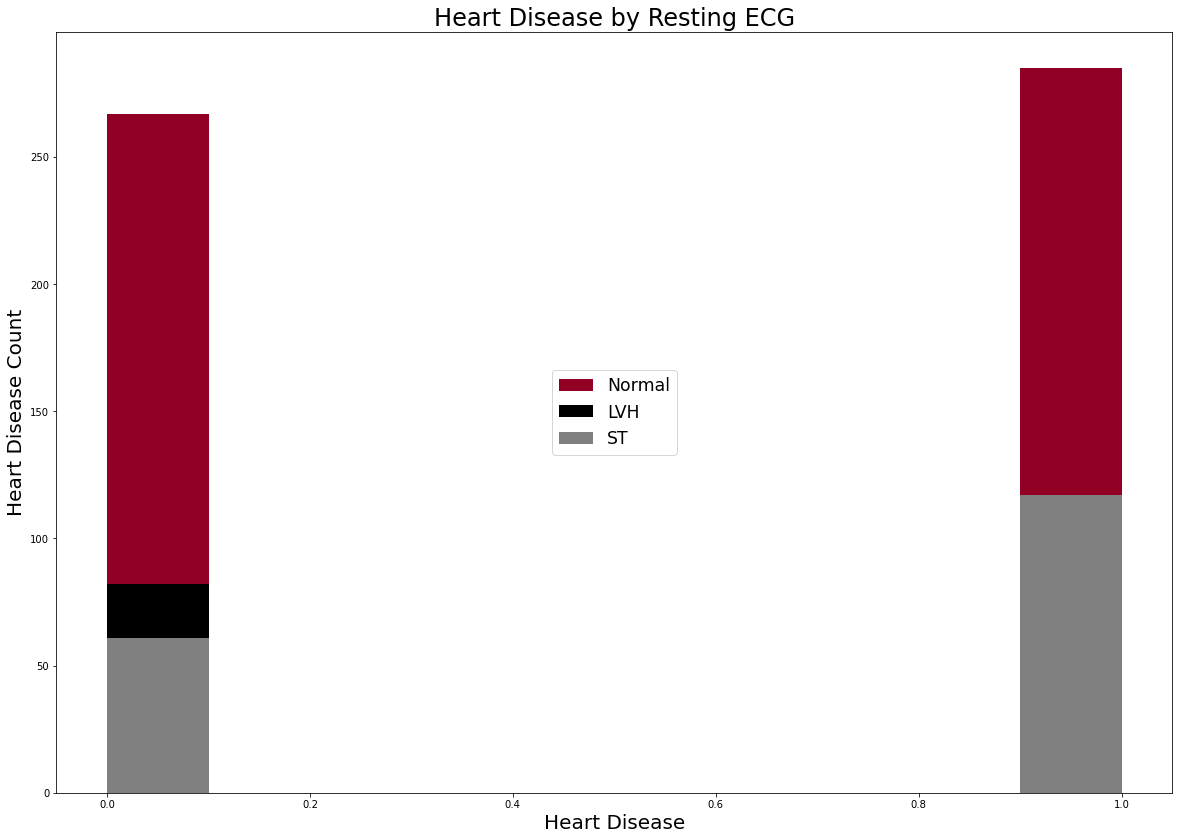

In [ ]:
have_disease = df_heart.loc[df_heart['HeartDisease']==1, 'RestingECG'].value_counts().hvplot.bar(alpha=0.4)
no_disease = df_heart.loc[df_heart['HeartDisease']==0, 'RestingECG'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Heart Disease by Resting ECG Results", xlabel='Resting ECG results',
    ylabel='Count', width=500, height=450, legend_cols=1, legend_position='top_right',
)
c= df_heart[df_heart['RestingECG']=='Normal']
d= df_heart[df_heart['RestingECG']=='LVH']
e= df_heart[df_heart['RestingECG']=='ST']
plt.hist(c['HeartDisease'], color=[(0.57,0,0.14)],label='Normal')
plt.hist(d['HeartDisease'],color='black',label='LVH')
plt.hist(e['HeartDisease'],color='gray',label='ST')
plt.legend(loc='center',fontsize='xx-large')
plt.xlabel('Heart Disease',fontsize=20)
plt.ylabel('Heart Disease Count',fontsize=20)
plt.title('Heart Disease by Resting ECG',fontsize=24)
plt.show()

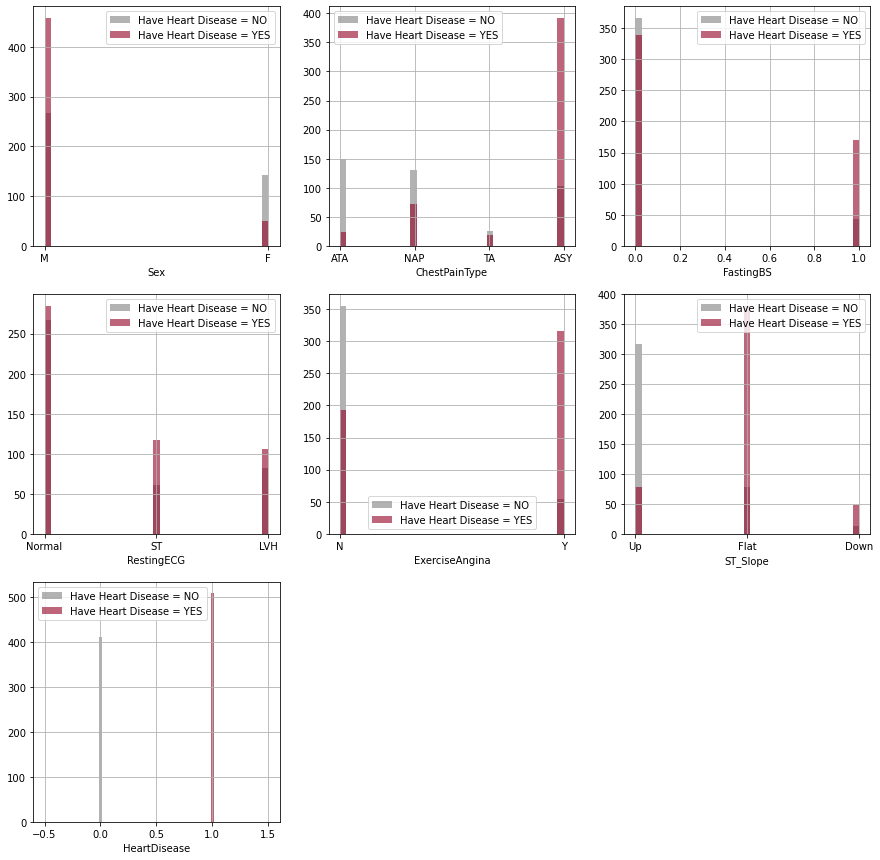

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df_heart[df_heart["HeartDisease"] == 0][column].hist(bins=35, color='grey', label='Have Heart Disease = NO', alpha=0.6)
    df_heart[df_heart["HeartDisease"] == 1][column].hist(bins=35, color=[(0.57,0,0.14)], label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

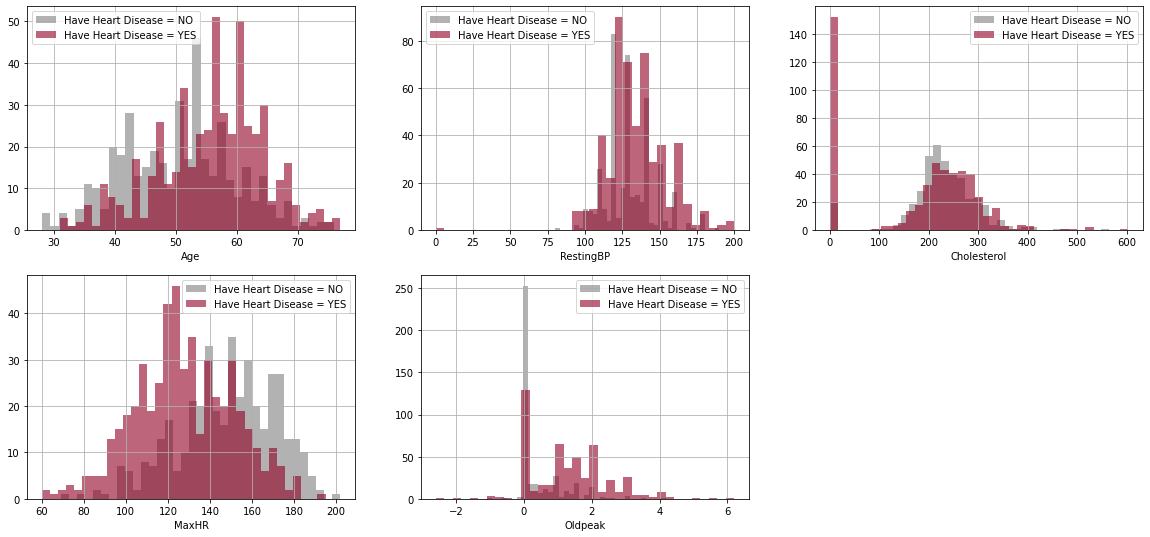

In [ ]:
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df_heart[df_heart["HeartDisease"] == 0][column].hist(bins=35, color='grey', label='Have Heart Disease = NO', alpha=0.6)
    df_heart[df_heart["HeartDisease"] == 1][column].hist(bins=35, color=[(0.57,0,0.14)], label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

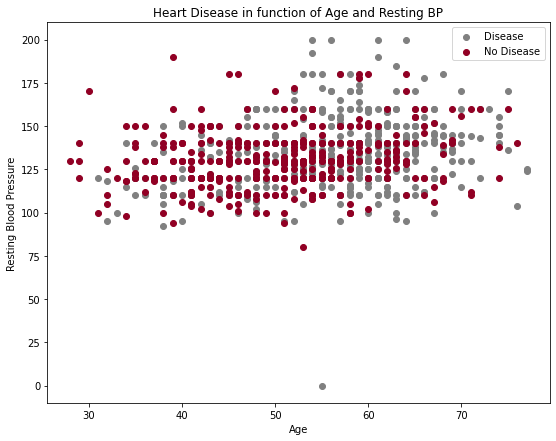

In [ ]:
#ate another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df_heart.Age[df_heart.HeartDisease==1],
            df_heart.RestingBP[df_heart.HeartDisease==1],
            c="Grey")

# Scatter with negative examples
plt.scatter(df_heart.Age[df_heart.HeartDisease==0],
            df_heart.RestingBP[df_heart.HeartDisease==0],
            c=[(0.57,0,0.14)])

# Add some helpful info
plt.title("Heart Disease in function of Age and Resting BP")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"]);


(7.5, -0.5)

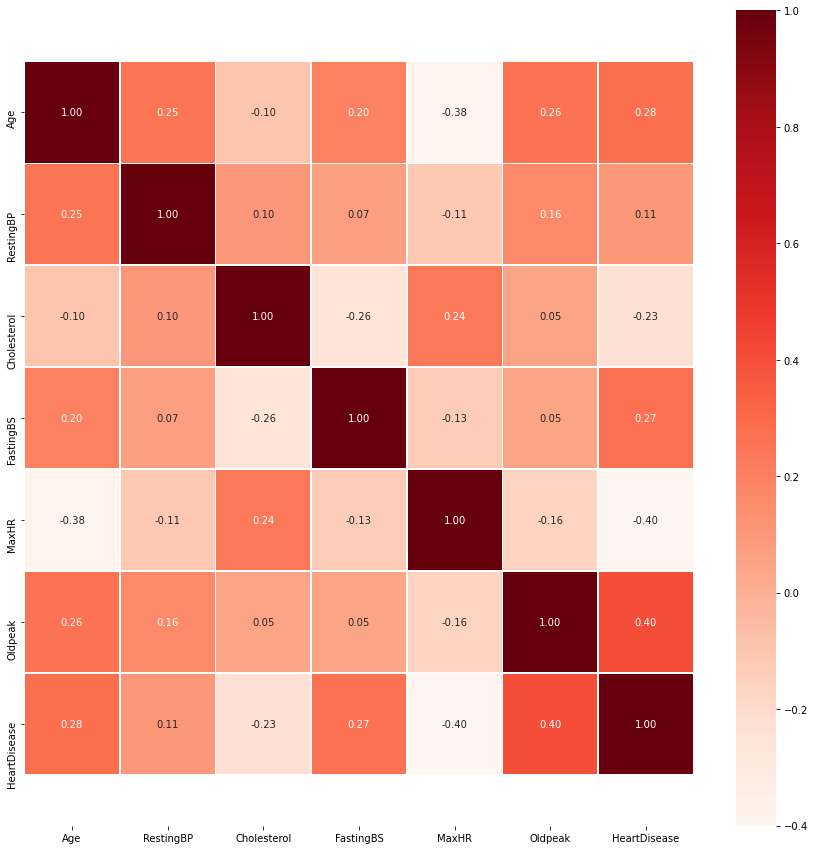

In [ ]:
corr_matrix = df_heart.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="Reds");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

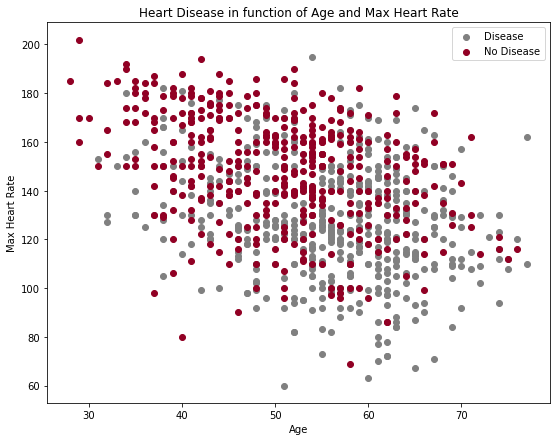

In [ ]:
#ate another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df_heart.Age[df_heart.HeartDisease==1],
            df_heart.MaxHR[df_heart.HeartDisease==1],
            c="Grey")

# Scatter with negative examples
plt.scatter(df_heart.Age[df_heart.HeartDisease==0],
            df_heart.MaxHR[df_heart.HeartDisease==0],
            c=[(0.57,0,0.14)])

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


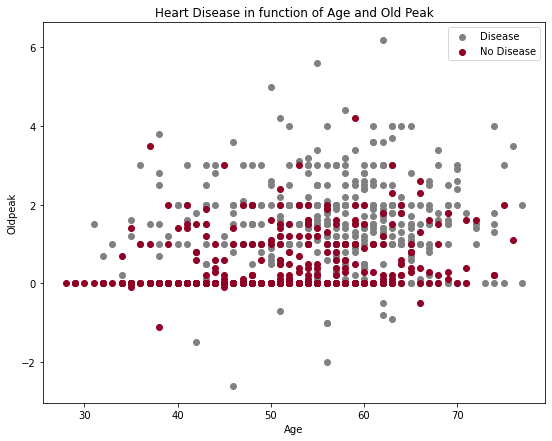

In [ ]:
#ate another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df_heart.Age[df_heart.HeartDisease==1],
            df_heart.Oldpeak[df_heart.HeartDisease==1],
            c="Grey")

# Scatter with negative examples
plt.scatter(df_heart.Age[df_heart.HeartDisease==0],
            df_heart.Oldpeak[df_heart.HeartDisease==0],
            c=[(0.57,0,0.14)])

# Add some helpful info
plt.title("Heart Disease in function of Age and Old Peak")
plt.xlabel("Age")
plt.ylabel("Oldpeak")
plt.legend(["Disease", "No Disease"]);


In [ ]:
cat_columns = df_heart.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df_heart[cat_columns] = df_heart[cat_columns].apply(lambda x: pd.factorize(x)[0])

## Splitting data into train and test

In [ ]:
X =  df_heart.drop(['HeartDisease'], axis=1)
print(X)
y = df_heart['HeartDisease']

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
feature_names = ['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope','Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#  Data Modeling

## Model 1: Random Forest Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8478260869565217
Precision: 0.8434782608695652
Recall: 0.9065420560747663


<AxesSubplot:>

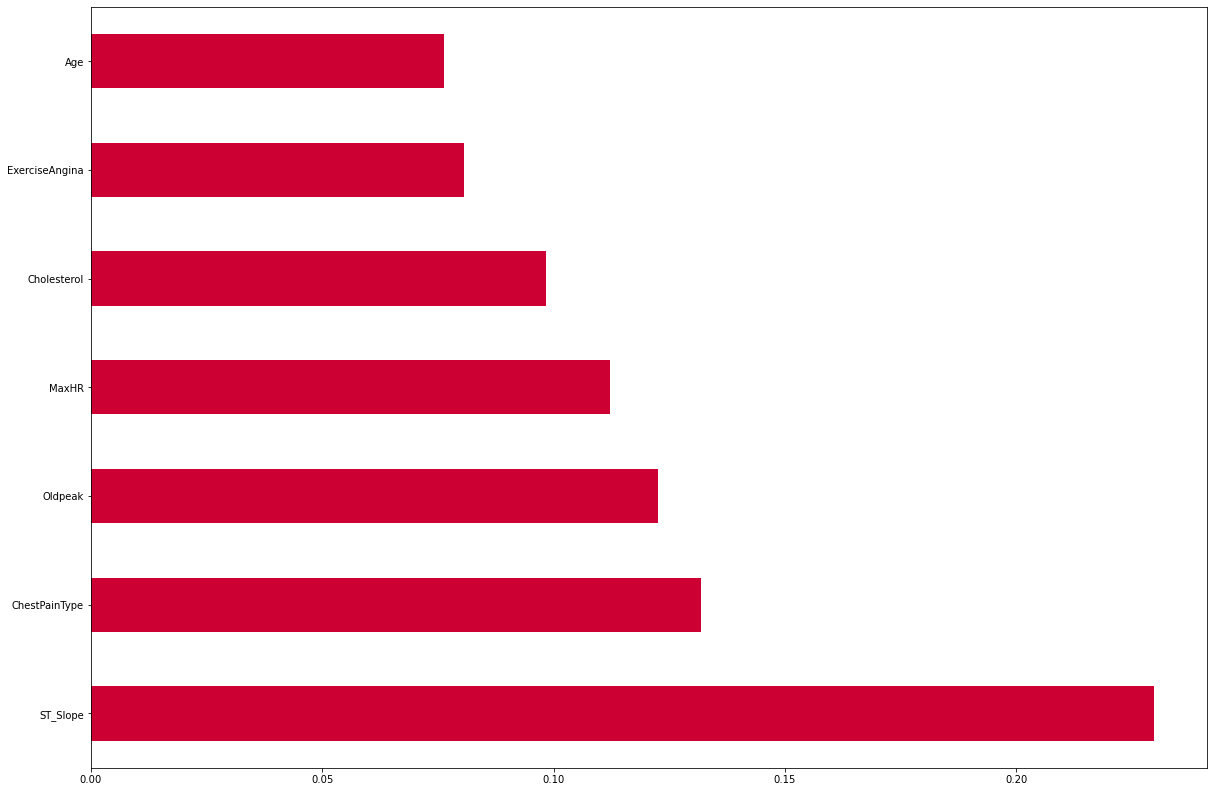

In [ ]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh',color=[(0.8,0,0.2)])

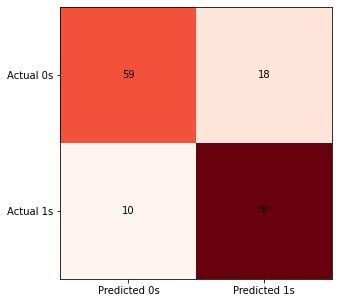

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Reds')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

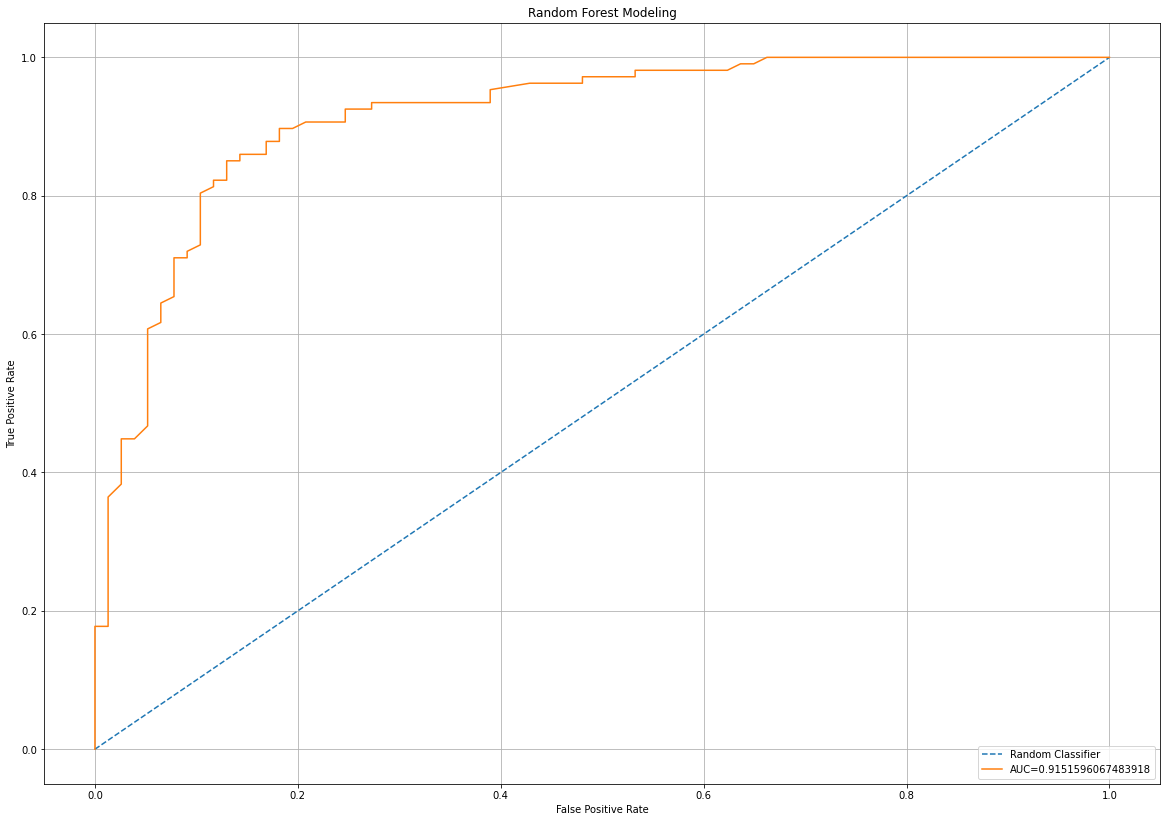

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve

plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Modeling')
plt.legend(loc=4)
plt.show()

#Creating and updating the dataframe of models
df_models = pd.DataFrame()
df3= {'Model':'Random Forest','Accuracy': accuracy_score(y_test, y_pred ), 'Precision': precision_score(y_test, y_pred ), 'Recall': recall_score(y_test, y_pred ),'AUC':auc}
df_models = df_models.append(df3, ignore_index = True)

## Model 2: Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)

C:\Users\ancha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.8369565217391305
Precision: 0.8468468468468469
Recall: 0.8785046728971962


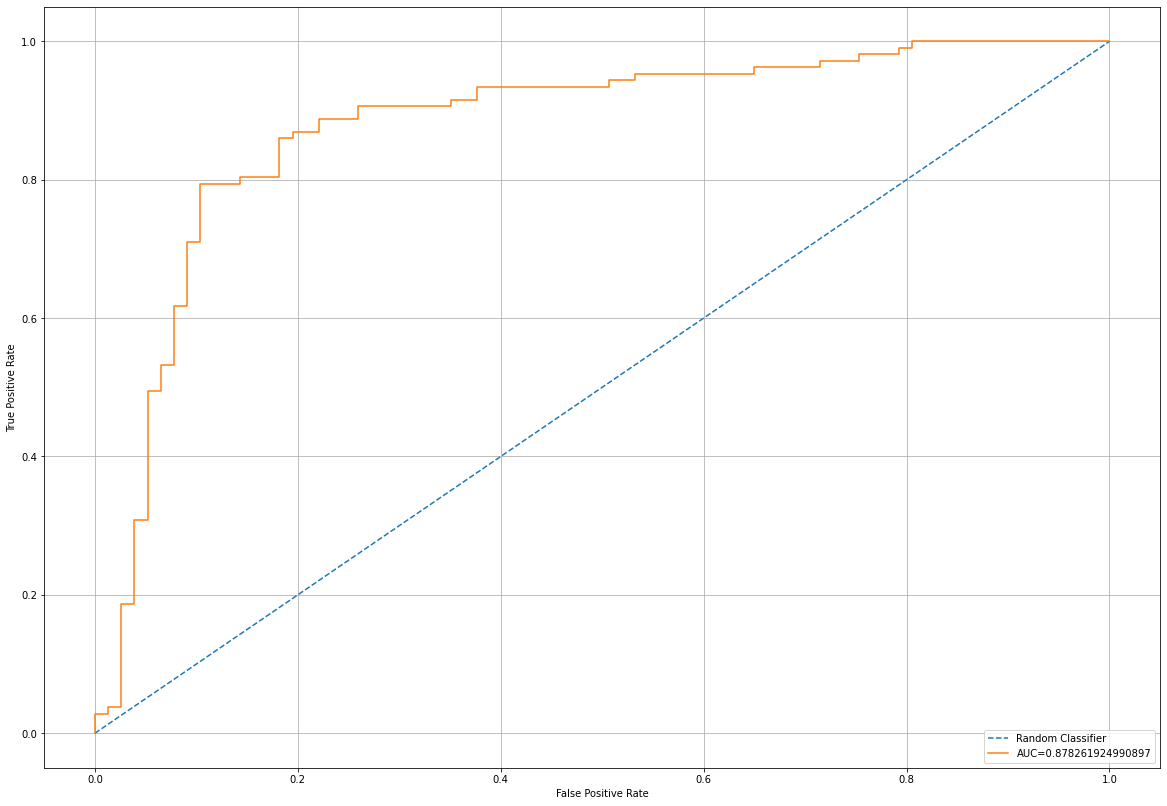

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#updating the model dataframe

df4= {'Model':'Multinomial Logistic Regression','Accuracy': accuracy_score(y_test, y_pred_log), 'Precision': precision_score(y_test, y_pred_log ), 'Recall': recall_score(y_test, y_pred_log ),'AUC':metrics.roc_auc_score(y_test, y_pred_log)}
df_models = df_models.append(df4, ignore_index = True)

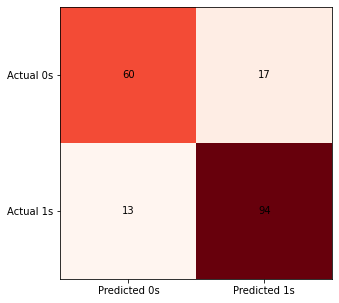

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Reds')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

## Model 3: Decision Tree

In [ ]:
classifier_decision=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_decision.fit(X_train, y_train)
y_pred_dec = classifier_decision.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dec))
print("Precision:",metrics.precision_score(y_test, y_pred_dec))
print("Recall:",metrics.recall_score(y_test, y_pred_dec))

Accuracy: 0.7934782608695652
Precision: 0.8349514563106796
Recall: 0.8037383177570093


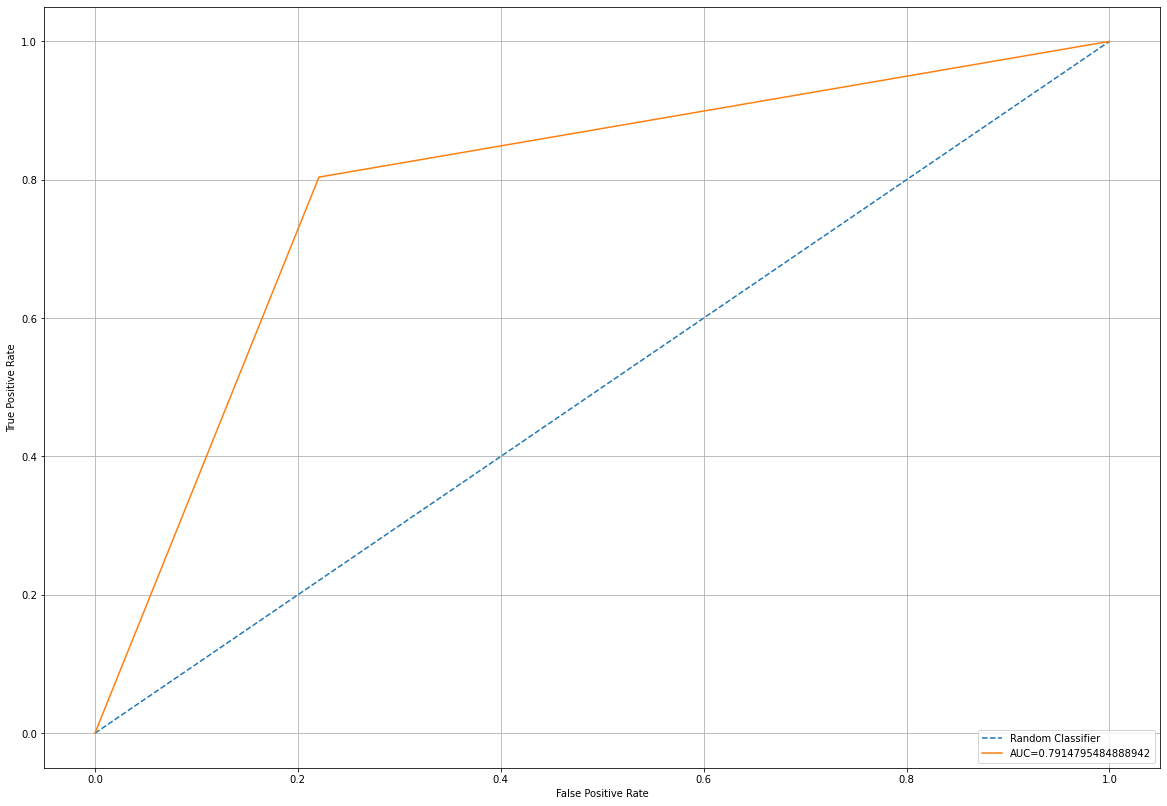

In [ ]:
#y_pred_proba = classifier_decision.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dec)
auc = metrics.roc_auc_score(y_test, y_pred_dec)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

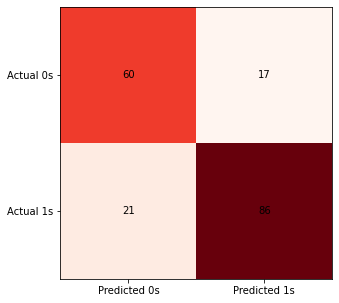

In [ ]:
cm = confusion_matrix(y_test, y_pred_dec)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Reds')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Black')
plt.show()

In [ ]:
df5= {'Model':'Decision Tree','Accuracy': accuracy_score(y_test, y_pred_dec), 'Precision': precision_score(y_test, y_pred_dec ), 'Recall': recall_score(y_test, y_pred_dec ),'AUC':metrics.roc_auc_score(y_test, y_pred_dec)}
df_models = df_models.append(df5, ignore_index = True)

## Model 4: Gaussian Naive Bayes

In [ ]:
guassian=GaussianNB()
guassian.fit(X_train, y_train)
y_pred_gaussian = guassian.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gaussian))
print("Precision:",metrics.precision_score(y_test, y_pred_gaussian))
print("Recall:",metrics.recall_score(y_test, y_pred_gaussian))

Accuracy: 0.8315217391304348
Precision: 0.8454545454545455
Recall: 0.8691588785046729


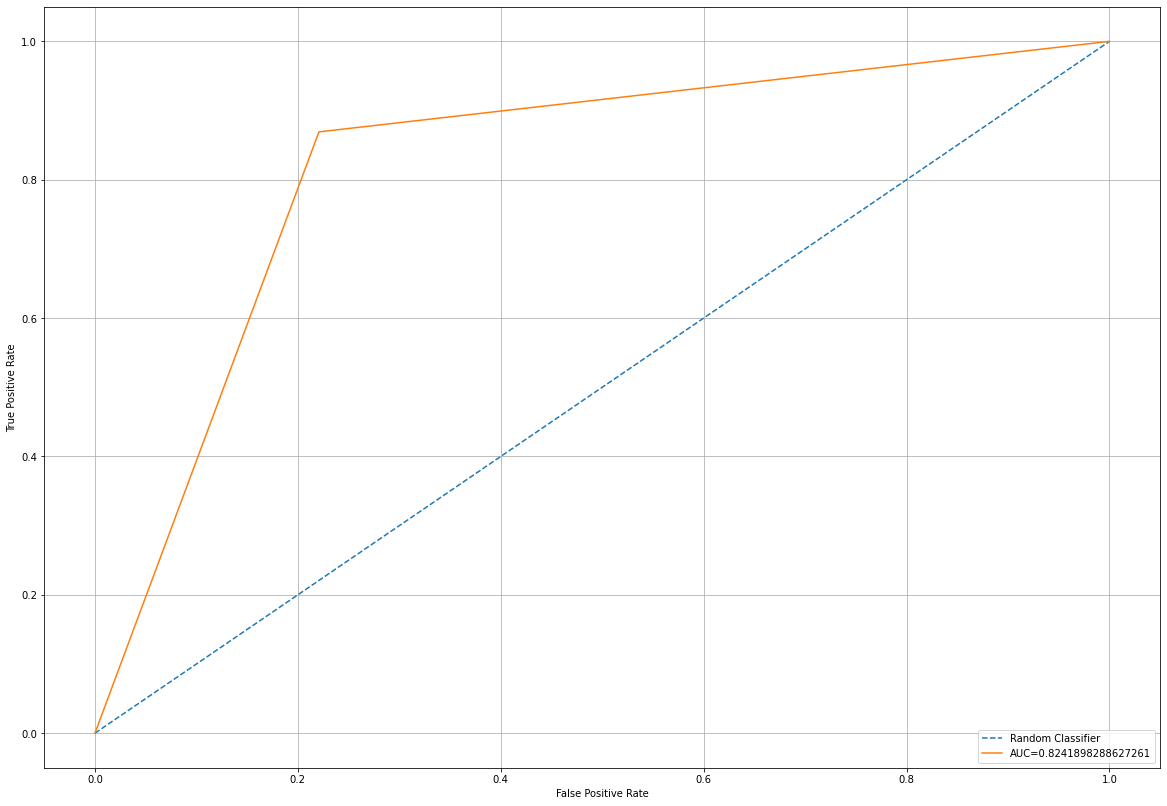

In [ ]:
#y_pred_proba = classifier_decision.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gaussian)
auc = metrics.roc_auc_score(y_test, y_pred_gaussian)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

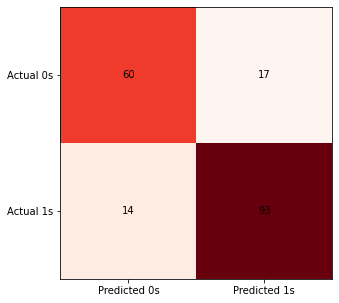

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_gaussian)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Reds')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm1[i, j], ha='center', va='center', color='Black')
plt.show()

In [ ]:
df6= {'Model':'Gaussian NB','Accuracy': accuracy_score(y_test, y_pred_gaussian), 'Precision': precision_score(y_test, y_pred_gaussian ), 'Recall': recall_score(y_test, y_pred_gaussian ),'AUC':metrics.roc_auc_score(y_test, y_pred_gaussian)}
df_models = df_models.append(df6, ignore_index = True)

## Model 5: Support Vector Machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)
y_pred_clf = svm_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))
print("Precision:",metrics.precision_score(y_test, y_pred_clf))
print("Recall:",metrics.recall_score(y_test, y_pred_clf))

Accuracy: 0.5815217391304348
Precision: 0.5833333333333334
Recall: 0.9813084112149533


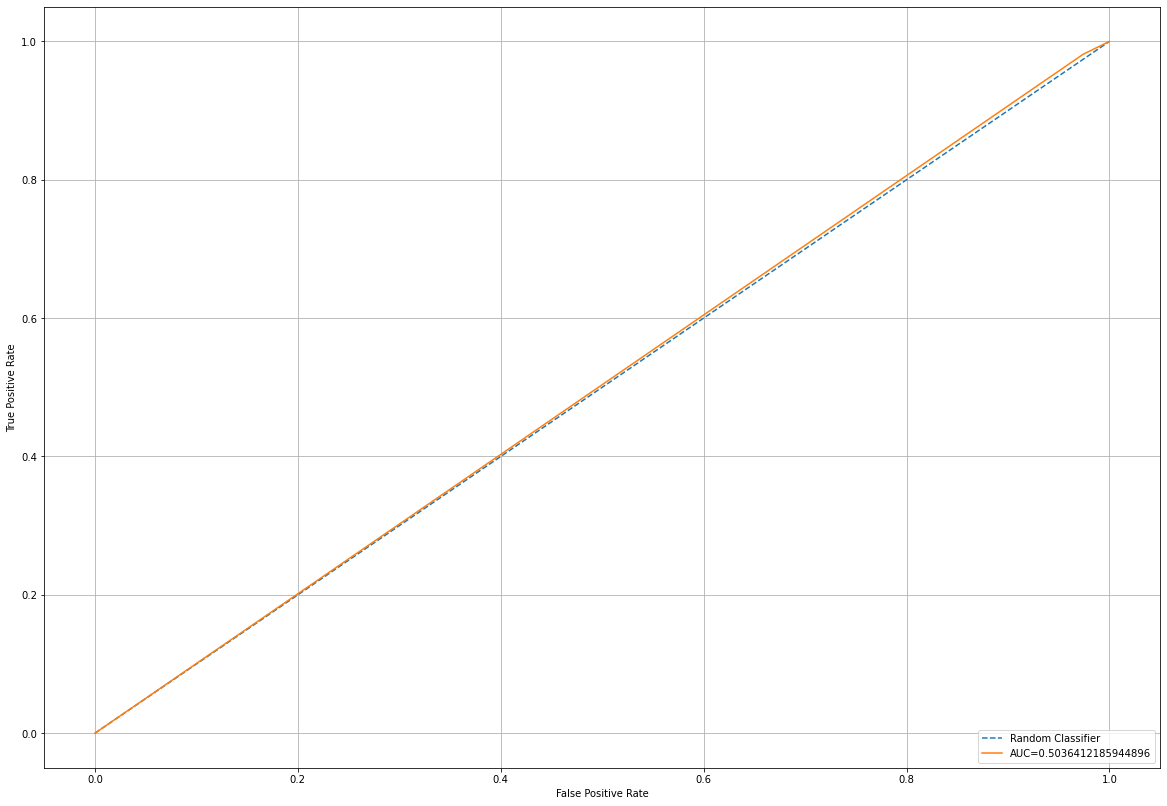

In [ ]:
#y_pred_proba = classifier_decision.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_clf)
auc = metrics.roc_auc_score(y_test, y_pred_clf)
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',label='Random Classifier')
#create ROC curve
plt.grid()
abline(1,0)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

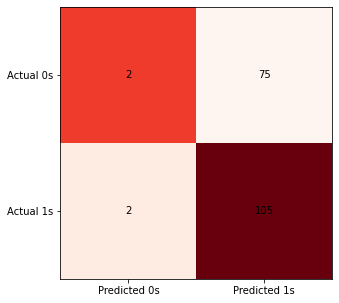

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_clf)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm,cmap='Reds')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm1[i, j], ha='center', va='center', color='Black')
plt.show()